In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../retrosynthesis/')

from common import *

from tqdm import tqdm
tqdm.pandas()

In [2]:
## input
YMDB_total_smiles_path = '../../Data/ymdb/ymdb_final_result.xlsx'
yeast870_path =  '../../Data/model/yeast-GEM.yml'

## output
target_smiles_path = '../../Results/not_lipid/target_smiles_not_lipid.pickle'
yeast_met_file = '../../Results/not_lipid/yeast_met_not_lipid.pickle'
fig1_a1_path = '../../Results/Figures/fig1-a.pdf'
fig1_a2_path = '../../Results/Figures/fig1-b.pdf'

### yeast8 metabolites,   ymdb metabolites

In [3]:
YMDB_Data = pd.read_excel(YMDB_total_smiles_path)
Lipids_total = len(YMDB_Data[YMDB_Data['super_class']=='Lipids and lipid-like molecules'])
Lipids_inmodel = len(YMDB_Data[(YMDB_Data['super_class']=='Lipids and lipid-like molecules')&(YMDB_Data['in_model']==1)])
Lipids_notinmodel = len(YMDB_Data[(YMDB_Data['super_class']=='Lipids and lipid-like molecules')&(YMDB_Data['in_model']!=1)])

Non_Lipids_total = len(YMDB_Data[YMDB_Data['super_class']!='Lipids and lipid-like molecules'])
Non_Lipids_inmodel = len(YMDB_Data[(YMDB_Data['super_class']!='Lipids and lipid-like molecules')&(YMDB_Data['in_model']==1)])
Non_Lipids_notinmodel = len(YMDB_Data[(YMDB_Data['super_class']!='Lipids and lipid-like molecules')&(YMDB_Data['in_model']!=1)])
print(Lipids_total,Lipids_inmodel,Lipids_notinmodel,Non_Lipids_total,Non_Lipids_inmodel,Non_Lipids_notinmodel)

total1 = Lipids_total
Lipids_inmodel_percent = Lipids_inmodel / total1 * 100
Lipids_notinmodel_percent = Lipids_notinmodel / total1 * 100

total2 = Non_Lipids_total 
Non_Lipids_inmodel_percent = Non_Lipids_inmodel / total2 * 100
Non_Lipids_notinmodel_percent = Non_Lipids_notinmodel / total2 * 100

YMDB_Data[YMDB_Data['super_class']!='Lipids and lipid-like molecules']['super_class'].value_counts()[0:4]

14806 496 14310 1236 664 572


Organic acids and derivatives    284
Organoheterocyclic compounds     225
Organic oxygen compounds         221
Benzenoids                       131
Name: super_class, dtype: int64

In [4]:
YMDB_met_num = len(YMDB_Data)
print('YMDB_all_num',YMDB_met_num)
YMDB_inmodel_met_num = len(YMDB_Data[YMDB_Data['in_model']==1])
print('YMDB_inmodel_met_num',YMDB_inmodel_met_num)
YMDB_notinmodel_met_num = YMDB_met_num-YMDB_inmodel_met_num
print('YMDB_notinmodel_met_num',YMDB_notinmodel_met_num)

YMDB_all_num 16042
YMDB_inmodel_met_num 1160
YMDB_notinmodel_met_num 14882


In [5]:
YMDB_notinmodel_lipids_num = len(YMDB_Data[(YMDB_Data['in_model']!=1)&(YMDB_Data['super_class']=='Lipids and lipid-like molecules')])
print('YMDB_notinmodel_lipids_num',YMDB_notinmodel_lipids_num)
YMDB_notinmodel_notlipids_num = len(YMDB_Data[(YMDB_Data['in_model']!=1)&(YMDB_Data['super_class']!='Lipids and lipid-like molecules')])
print('YMDB_notinmodel_notlipids_num',YMDB_notinmodel_notlipids_num)

YMDB_notinmodel_lipids_num 14310
YMDB_notinmodel_notlipids_num 572


In [6]:
notlipids_top1_num = YMDB_Data[(YMDB_Data['in_model']!=1)&(YMDB_Data['super_class']!='Lipids and lipid-like molecules')]['super_class'].value_counts()[0:1][0]
notlipids_top1_name = YMDB_Data[(YMDB_Data['in_model']!=1)&(YMDB_Data['super_class']!='Lipids and lipid-like molecules')]['super_class'].value_counts()[0:1].index[0]
print(notlipids_top1_name,notlipids_top1_num)

notlipids_top2_num = YMDB_Data[(YMDB_Data['in_model']!=1)&(YMDB_Data['super_class']!='Lipids and lipid-like molecules')]['super_class'].value_counts()[1:2][0]
notlipids_top2_name = YMDB_Data[(YMDB_Data['in_model']!=1)&(YMDB_Data['super_class']!='Lipids and lipid-like molecules')]['super_class'].value_counts()[1:2].index[0]
print(notlipids_top2_name,notlipids_top2_num)

notlipids_top3_num = YMDB_Data[(YMDB_Data['in_model']!=1)&(YMDB_Data['super_class']!='Lipids and lipid-like molecules')]['super_class'].value_counts()[2:3][0]
notlipids_top3_name = YMDB_Data[(YMDB_Data['in_model']!=1)&(YMDB_Data['super_class']!='Lipids and lipid-like molecules')]['super_class'].value_counts()[2:3].index[0]
print(notlipids_top3_name,notlipids_top3_num)

notlipids_top4_num = YMDB_Data[(YMDB_Data['in_model']!=1)&(YMDB_Data['super_class']!='Lipids and lipid-like molecules')]['super_class'].value_counts()[3:4][0]
notlipids_top4_name = YMDB_Data[(YMDB_Data['in_model']!=1)&(YMDB_Data['super_class']!='Lipids and lipid-like molecules')]['super_class'].value_counts()[3:4].index[0]
print(notlipids_top4_name,notlipids_top4_num)

notlipids_others_num = YMDB_notinmodel_notlipids_num-notlipids_top1_num-notlipids_top2_num-notlipids_top3_num-notlipids_top4_num
notlipids_others_name = 'Others'
print(notlipids_others_name,notlipids_others_num)

Organoheterocyclic compounds 137
Benzenoids 105
Organic acids and derivatives 90
Organic oxygen compounds 86
Others 154


In [7]:
total1 = YMDB_met_num
inmodel_percent = YMDB_inmodel_met_num / total1 * 100
notinmodel_lipids_percent = YMDB_notinmodel_lipids_num / total1 * 100
notinmodel_notlipids_percent = YMDB_notinmodel_notlipids_num / total1 * 100
print(YMDB_inmodel_met_num,YMDB_notinmodel_lipids_num,YMDB_notinmodel_notlipids_num)

1160 14310 572


### fig1a

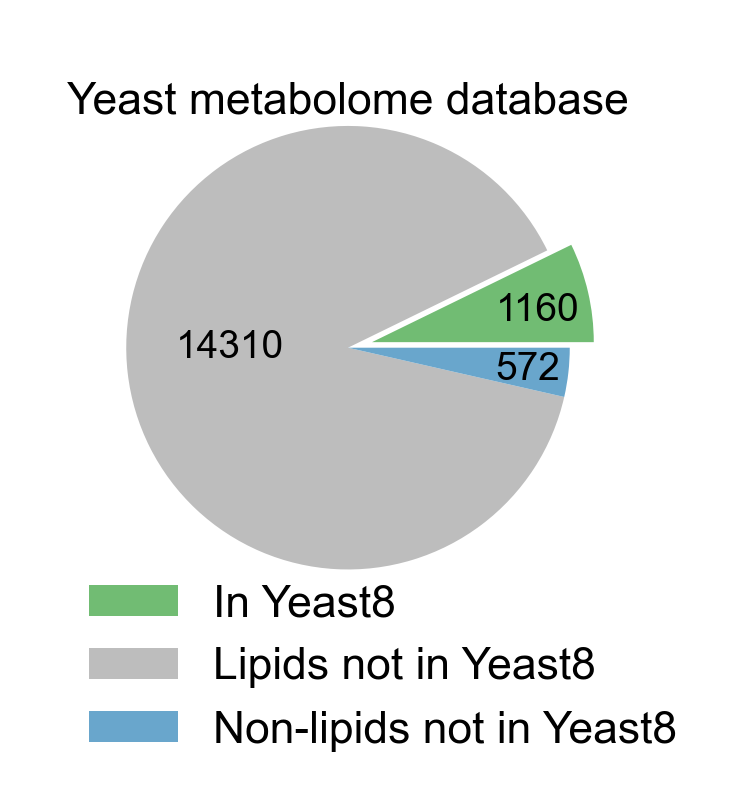

In [10]:
# Set the font type
plt.rcParams.update({'font.size': 8})
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype'] = 42

# Create the figure and increase its size
fig, ax = plt.subplots(figsize=(2.5, 2), dpi=400)

# Draw the pie chart and add data labels
explode0 = (0.1, 0.0, 0.0)  # Offset a portion

ax.pie([inmodel_percent, notinmodel_lipids_percent, notinmodel_notlipids_percent], 
       colors=['#71bc73', '#bdbdbd', '#69a6cc'], explode=explode0, radius=0.9)
ax.set_aspect('equal')

# Add data labels
labels0 = [YMDB_notinmodel_lipids_num, YMDB_notinmodel_notlipids_num, YMDB_inmodel_met_num]
ax.text(0, 1, 'Yeast metabolome database', ha='center', va='center', fontsize=8, color='black', family='Arial')
ax.text(-0.48, 0, labels0[0], ha='center', va='center', fontsize=7, color='black', family='Arial')
ax.text(0.73, -0.09, labels0[1], ha='center', va='center', fontsize=7, color='black', family='Arial')
ax.text(0.77, 0.15, labels0[2], ha='center', va='center', fontsize=7, color='black', family='Arial')

ax.legend(["In Yeast8", "Lipids not in Yeast8", "Non-lipids not in Yeast8"], 
          bbox_to_anchor=(1.1, -0.22), loc='lower right', fontsize=8, frameon=False)
# Display the figure
plt.savefig(fig1_a1_path, dpi=400, bbox_inches='tight')
plt.show()

### figure 1b

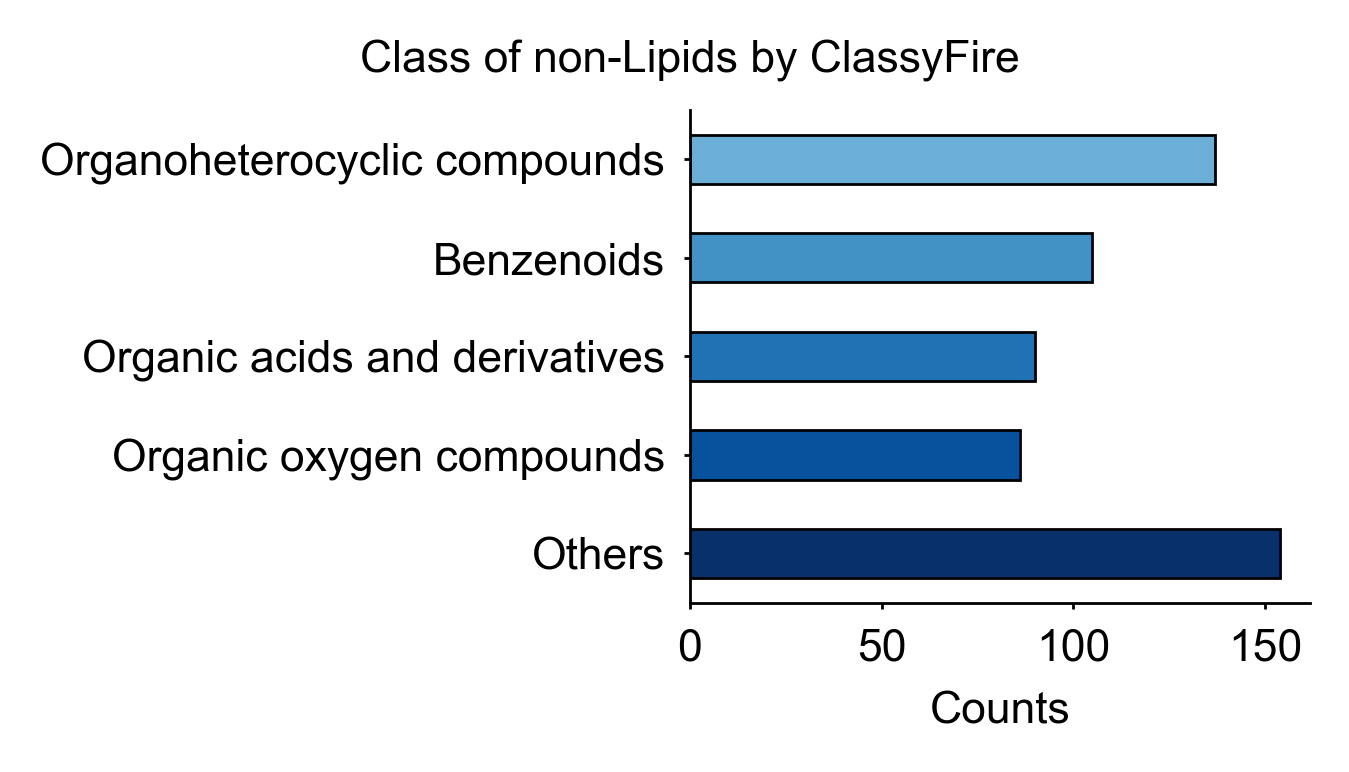

In [12]:
# Set the font type
plt.rcParams.update({'font.size': 8})
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype'] = 42

# Create the figure and increase its size
fig, ax = plt.subplots(figsize=(2, 1.6), dpi=400)

# Set the linewidth of the spines
ax.spines['top'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Data
data2 = [notlipids_top1_num, notlipids_top2_num, notlipids_top3_num, notlipids_top4_num, notlipids_others_num]
data2 = [notlipids_others_num, notlipids_top4_num, notlipids_top3_num, notlipids_top2_num, notlipids_top1_num]

# Create a horizontal bar chart
width = 0.5
ax.barh([0.5, 1.5, 2.5, 3.5, 4.5], data2, color=['#08306b', '#08519c', '#2171b5', '#4292c6', '#6baed6'], height=width, edgecolor='black', linewidth=0.5, label='CLEAN')

# Set the tick positions and labels
ax.set_yticks([0.5, 1.5, 2.5, 3.5, 4.5])
ax.set_yticklabels([notlipids_others_name, notlipids_top4_name, notlipids_top3_name, notlipids_top2_name, notlipids_top1_name])
ax.set_xlabel('Counts', fontsize=8)

# Set the axis parameters
ax.tick_params(axis='y', direction='out', width=0.5, which='both', length=1)
ax.tick_params(axis='x', direction='out', width=0.5, which='both', length=1)

# Set the y-axis limits
plt.ylim(0, 5)
plt.text(0, 5.5, 'Class of non-Lipids by ClassyFire', ha='center', va='center', fontsize=8, color='black', family='Arial')

# Save the figure
plt.savefig(fig1_a2_path, dpi=400, bbox_inches='tight')

# Show the figure
plt.show()